In [1]:
import os
import pandas as pd
import geopandas as gpd
import fiona
import random
from rasterio.plot import  show, show_hist
from rasterio.mask import mask
from shapely.geometry import Polygon
from matplotlib import pyplot
import rasterio
import glob
import os
import time
import numpy as np

In [ ]:
# in_dir = '/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data'
# out_dir = '/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/output'
# lab5functions  = (r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/lab5functions.py')
# from lab5functions import *

# dem_rs = rasterio.open(in_dir + '/bigElk_dem.tif')
# dem_arr = dem_rs.read(1)
# sat_imgs = glob.glob(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data/L5_big_elk/*.tif')
# sat_imgs.sort()
# DEMslope, aspect = slopeAspect(dem_arr, 90)
# DEM2 = reclassAspect(aspect)
# DEM3 = reclassByHisto(DEMslope, 10)
# with rasterio.open(in_dir + '/fire_perimeter.tif') as fire:
#     fire_per = fire.read()
# band3 = []
# band4 = []
# final_print = []
# year = []
# flat_rr = []
# for img in sat_imgs:
#     if 'B3.tif' in img:
#         band3.append(img)
#     if 'B4.tif' in img:
#         band4.append(img)
# for b3, b4 in zip(band3, band4):
#     year.append(b3[-11:-7])
#     with rasterio.open(b3, 'r') as data3:
#         band3_arr = data3.read()
#     with rasterio.open(b4, 'r') as data4:
#         band4_arr = data4.read()
#     ndvi = (band4_arr - band3_arr) / (band4_arr + band3_arr)
#     healthy_veg = np.where(fire_per == 2)
#     burned_veg = np.where(fire_per == 1)
#     ndvi_mean = ndvi[healthy_veg].mean()
#     rr = ndvi / ndvi_mean
#     final = rr[burned_veg].mean()
#     final_print.append(final)
#     flat = rr.flatten()
#     flat_rr.append(flat)
# stacked_ratio = np.vstack(flat_rr)
# trend_line = np.polyfit(range(10), stacked_ratio, 1)[0]
# trend_reshape = trend_line.reshape(280, 459)
# mean_coef = np.where(fire_per==1, trend_reshape, np.nan)
# coefficient = np.nanmean(mean_coef)
# for yr, rat in zip(year, final_print):
#     print("In", yr, "the mean recovery ratio was", rat)
# print("The mean coefficient of recovery across all years for the burned area is", coefficient)

# def zonal_stats_table(zone_raster, value_raster, output_csv):
#     mean_stats = []
#     max_stats = []
#     min_stats = []
#     count_stats = []
#     std_stats = []
#     for u in np.unique(zone_raster):
#         zone = np.where(zone_raster, u, np.nan)
#         min_stats.append(np.nanmin(zone * value_raster))
#         max_stats.append(np.nanmax(zone * value_raster))
#         mean_stats.append(np.nanmean(zone * value_raster))
#         std_stats.append(np.nanstd(zone * value_raster))
#         count_stats.append(np.where(value_raster > 0, 1, 0).sum())
#     zonal_stats = {'Min': min_stats, 'Max': max_stats, 'Mean': mean_stats, 'StD': std_stats, 'Count': count_stats}
#     df = pd.DataFrame(zonal_stats)
#     df.to_csv(output_csv)
#     return df
# zonal_stats_table(DEM3, mean_coef, "output_csv")

In [52]:
#Utilize the glob function to see all tiffs in file
file = glob.glob(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data/L5_big_elk/*.tif')
file.sort()
#Using the glob output, split the bands into two arrays   
rasters_B3 = []
rasters_B4 = []
year = []
for raster in file:
    if 'B3' in raster:
        with rasterio.open(raster) as data:
            array = data.read(1)
            rasters_B3.append(array)
            year.append(raster[-11:-7]) #this will be used to link outcomes to their year
for raster in file:
    if 'B4' in raster:
        with rasterio.open(raster) as data:
            array = data.read(1)
            rasters_B4.append(array)
#open the fire perimeter
fire_perimeter = rasterio.open(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data/fire_perimeter.tif').read(1)
final_mean = []
flat_rr = []
#Create a for loop to read through B3 and B4 bands to find NDVI and RR
for b3,b4 in zip(rasters_B3, rasters_B4):
    ndvi = ((b4 - b3) / (b4 + b3)) #Calculate the NDVI
    healthy = np.where(fire_perimeter ==2) #Call only healthy forest
    fire = np.where(fire_perimeter == 1)   #Call burned area
    ndvi_mean = ndvi[healthy].mean()    #Find the mean NDVI of the healthy forest
    rr = ndvi / ndvi_mean            #Find the recovery ratio based on the healthy forest
    burned_mean = rr[fire].mean()   #Find the mean recovery ratio of the burned forest
    final_mean.append(burned_mean)
    flat = rr.flatten()            #Flatten all arrays
    flat_rr.append(flat)
#Stack the flattened Arrays
stacked_ratio = np.vstack(flat_rr)
#Use the polyfitfunction to trend of the recovery ratio
trend_line = np.polyfit(range(10), stacked_ratio, 1)[0]
trend_reshape = trend_line.reshape(280, 459)
#Find the coefficient of recovery
mean_coef = np.where(fire_perimeter==1, trend_reshape, np.nan)
coefficient = np.nanmean(mean_coef)
for y,r in zip(year,final_mean):
    print("In", y, "the mean recovery ratio was", r, "and the mean coefficient of recovery was 0.021795632717297477.")
lab5functions  = (r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/lab5functions.py')
#Set an environment to call given functions
from lab5functions import *
os.chdir(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data')
#Open up the DEM
DEM_ras = rasterio.open(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data/bigElk_dem.tif')
DEM_read = DEM_ras.read(1)
#Call the slope/aspect function that create the arrays
slp, aspect = slopeAspect(DEM_read, 90)
#Call the reclass Aspect function to reclass the aspect to cardinal directions
reclass_aspect = reclassAspect(aspect)
#Call the reclass function to reclass the slope into 10 classes
DEM_reclass = reclassByHisto(slp, 10) 
#This function calculates mean, max, min, standard deviation, and count of the coefficient of recovery for burned area and export as a CSV
def zonal_stats_table(zones, value_raster, csv_name):
    mean_stats = []
    max_stats = []
    min_stats = []
    count_stats = []
    std_stats = []
    zone_num = []
    for u in np.unique(zones):
        ras = np.where(zones==u, u, np.nan)
        min_stats.append(np.nanmin(ras * value_raster))
        max_stats.append(np.nanmax(ras * value_raster))
        mean_stats.append(np.nanmean(ras * value_raster))
        std_stats.append(np.nanstd(ras * value_raster))
        count_stats.append(np.where(zones == u, 1, 0).sum())
        zone_num.append(int(u))
    stats = {'Zone' : zone_num, 'MIN': min_stats, 'MAX': max_stats, 'MEAN': mean_stats, 'STD': std_stats, 'COUNT': count_stats}
    df = pd.DataFrame(stats)
    df.to_csv(csv_name)
    return df

#Call function to find zonal stats and export as a csv file
zonal_stats_table(DEM_reclass, mean_coef, 'slp.csv')
zonal_stats_table(reclass_aspect, mean_coef, 'aspect.csv') 

#Export the coefficient of recovery as a GeoTiff
with rasterio.open(r'/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab5/data/bigElk_dem.tif') as dataset:
    with rasterio.open(f'//Users//jonathanburton//Desktop//Fall2020//Geog5092//lab5//datarecovery_coefficent.tif' , 'w',
                       driver='GTiff',
                       height=mean_coef.shape[0],
                       width=mean_coef.shape[1],
                       count=1,
                       dtype=mean_coef.dtype,
                       crs=dataset.crs,
                       transform=dataset.transform, 
                       nodata=dataset.nodata
                      ) as out_dataset:
        out_dataset.write(mean_coef,1)
        
conclusion = "It appears that relatively steeper slopes and a southeast to southwest aspect leads to increased vegatative recovery compared to other slope or aspects."
print(conclusion)

In 2002 the mean recovery ratio was 0.41126525 and the mean coefficient of recovery was 0.021795632717297477.
In 2003 the mean recovery ratio was 0.5412664 and the mean coefficient of recovery was 0.021795632717297477.
In 2004 the mean recovery ratio was 0.51346225 and the mean coefficient of recovery was 0.021795632717297477.
In 2005 the mean recovery ratio was 0.61524826 and the mean coefficient of recovery was 0.021795632717297477.
In 2006 the mean recovery ratio was 0.7161738 and the mean coefficient of recovery was 0.021795632717297477.
In 2007 the mean recovery ratio was 0.70540994 and the mean coefficient of recovery was 0.021795632717297477.
In 2008 the mean recovery ratio was 0.739514 and the mean coefficient of recovery was 0.021795632717297477.
In 2009 the mean recovery ratio was 0.7126317 and the mean coefficient of recovery was 0.021795632717297477.
In 2010 the mean recovery ratio was 0.58509773 and the mean coefficient of recovery was 0.021795632717297477.
In 2011 the mea

In [50]:
DEM_reclass

array([[1., 1., 1., ..., 4., 6., 1.],
       [2., 2., 1., ..., 6., 6., 3.],
       [2., 2., 2., ..., 3., 3., 2.],
       ...,
       [1., 1., 1., ..., 3., 2., 2.],
       [1., 1., 1., ..., 2., 2., 3.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

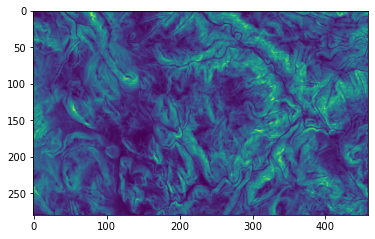

<AxesSubplot:>

In [46]:
show(slp)

In [48]:
type(slp)

numpy.ndarray